<a href="https://colab.research.google.com/github/minonza/datatrained_projects/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of integer except ERA which is float
print(df.info())

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 n

In [7]:
df.shape

(16468, 14)

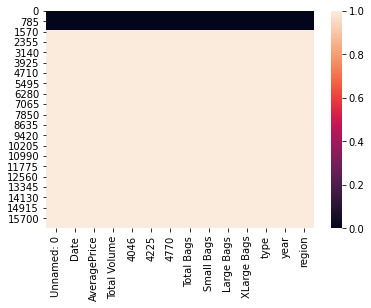

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [10]:
df1=df.dropna()

In [11]:
df1.shape

(1517, 14)

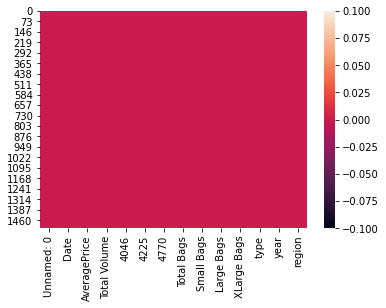

In [12]:
sns.heatmap(df1.isnull())

In [13]:
df1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df1[i]=le.fit_transform(df1[i].astype(str))

In [15]:
df1.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

# Univariate Analysis

Unnamed: 0         AxesSubplot(0.125,0.657941;0.0945122x0.222059)
AveragePrice    AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Total Volume    AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
4046            AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
4225            AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
4770            AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
Total Bags      AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Small Bags         AxesSubplot(0.125,0.391471;0.0945122x0.222059)
Large Bags      AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
XLarge Bags     AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
type            AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
year            AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
region          AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
dtype: object

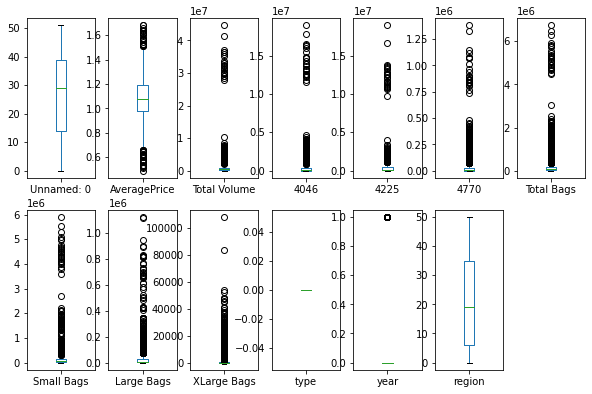

In [16]:
#from below observation we can say lots of outliers are present in the data set
df1.plot(kind='box',subplots=True,layout=(3,7),figsize=(10,10))

In [17]:
df1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,0.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,0.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,0.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,0.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,0.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,1.000000,50.000000


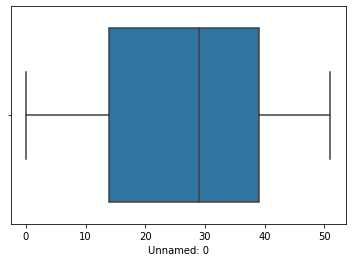

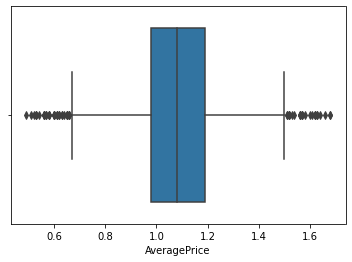

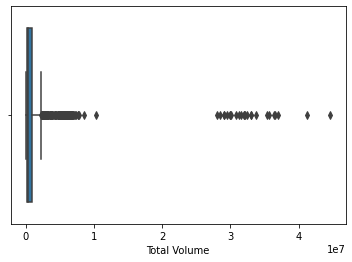

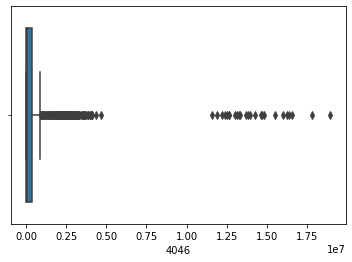

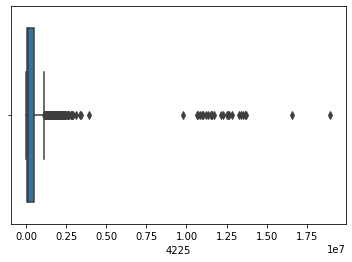

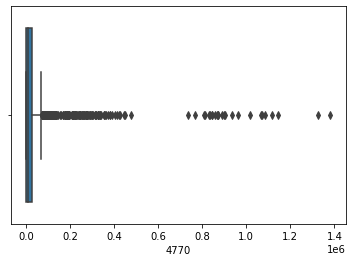

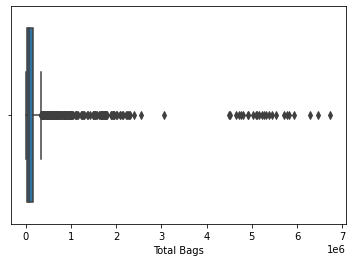

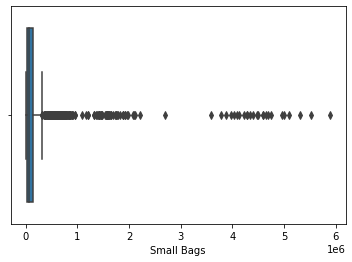

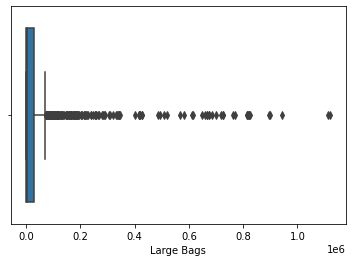

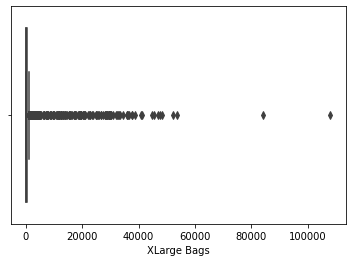

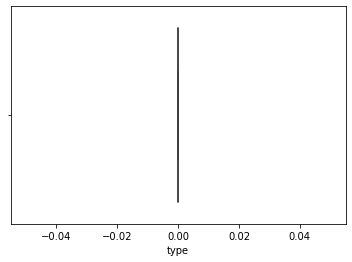

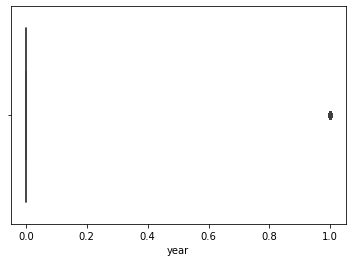

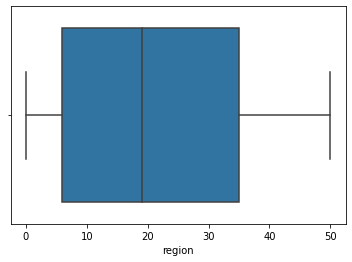

In [18]:
# Cheacking whether the columns has outliers or not
for i in df1.describe().columns:
    sns.boxplot(df1[i])
    plt.show()

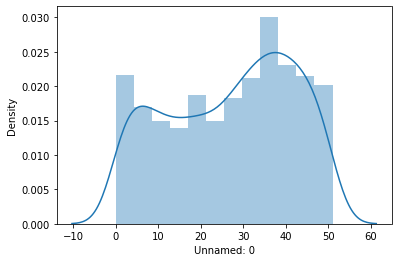

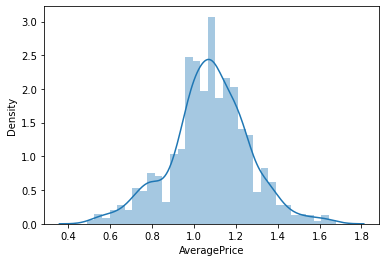

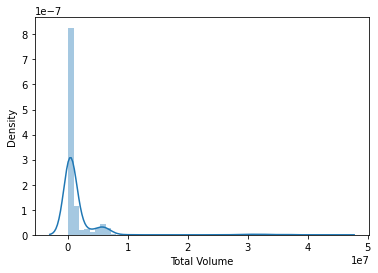

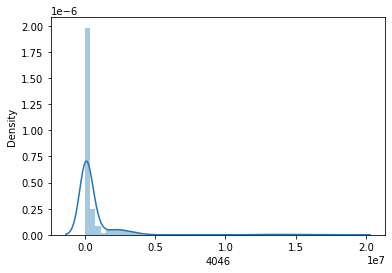

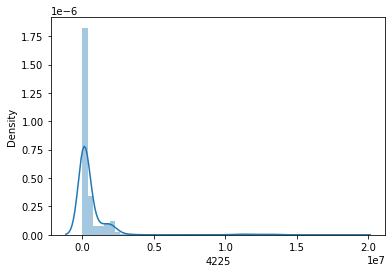

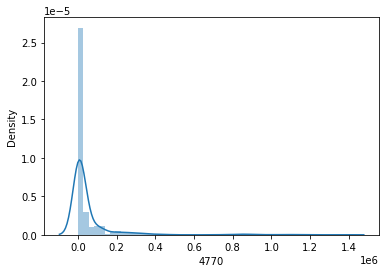

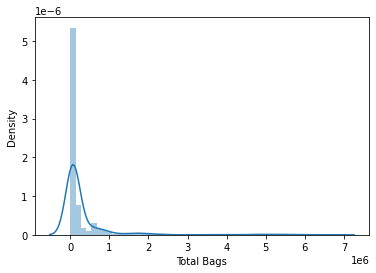

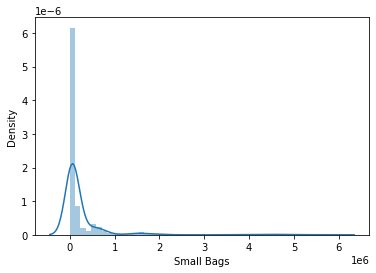

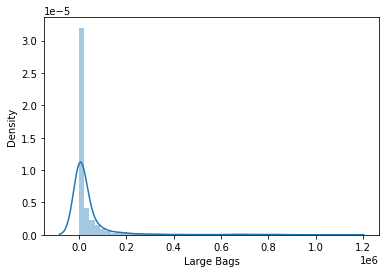

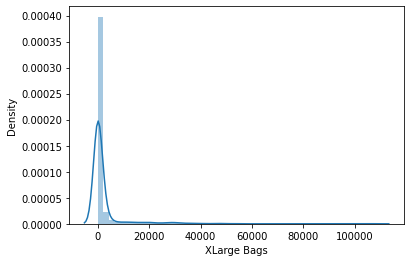

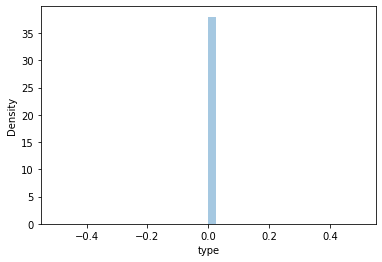

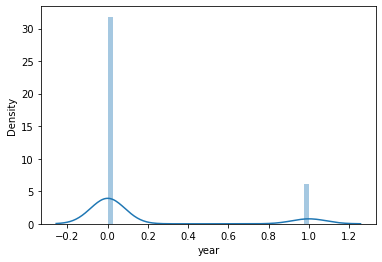

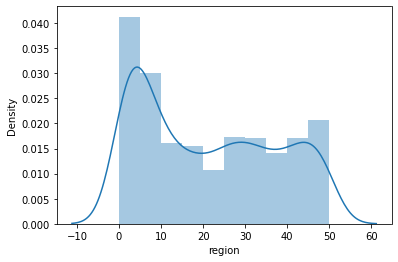

In [19]:
#checking wheather the columns are normally distributed or not

for i in df1.describe().columns:
    sns.distplot(df1[i])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d0f063fd0>,
      dtype=object)

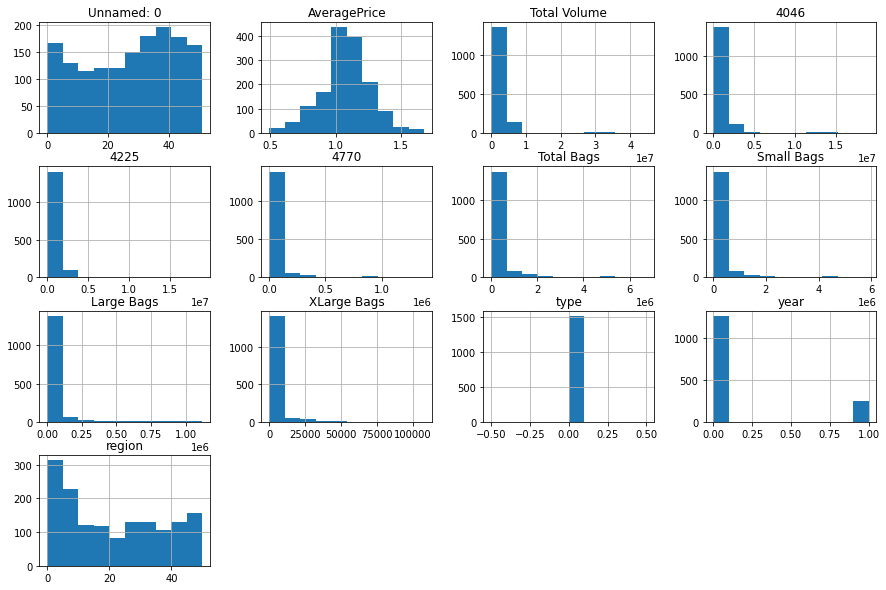

In [20]:
df1.hist(figsize=(15,10),bins=10)

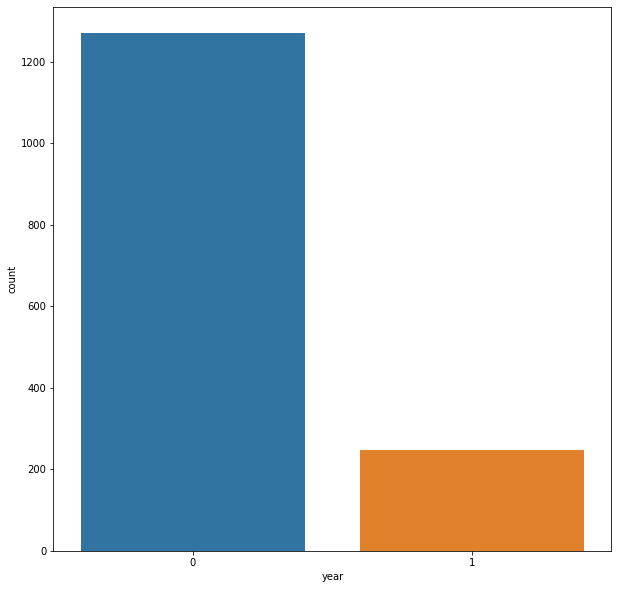

In [21]:
plt.figure(figsize=[10,10])
sns.countplot(x = 'year', data = df1)

Text(0, 0.5, 'Total Volume')

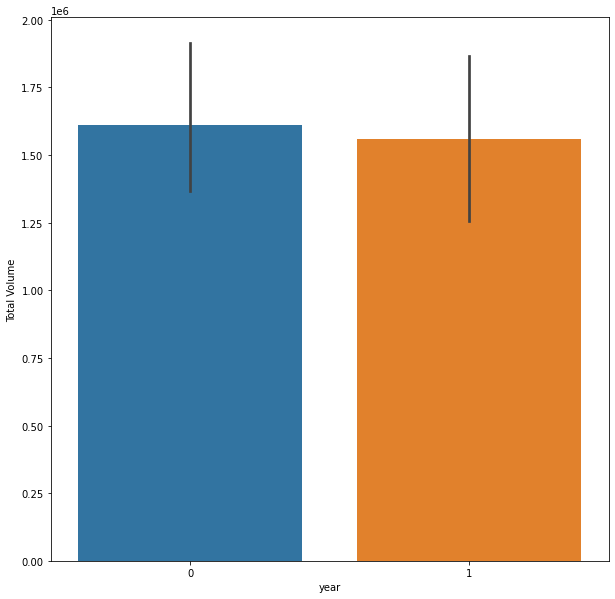

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x="year",y="Total Volume",data=df1)
plt.xlabel("year")
plt.ylabel("Total Volume")

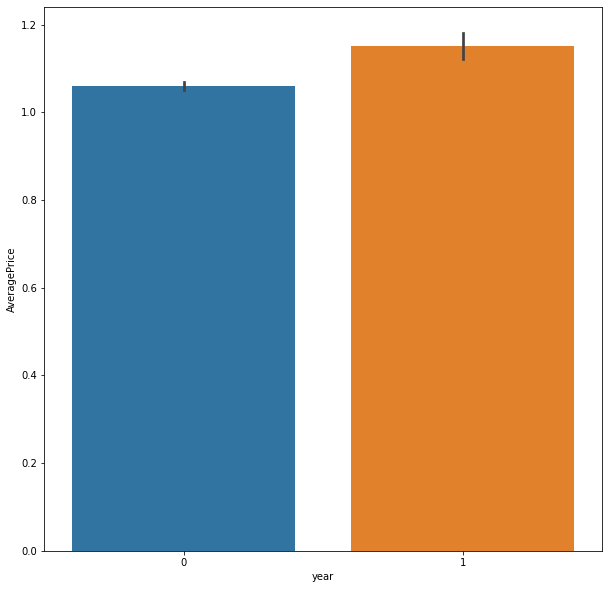

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x ="year",y="AveragePrice",data=df1)
plt.xlabel("year")
plt.ylabel("AveragePrice")
plt.show()

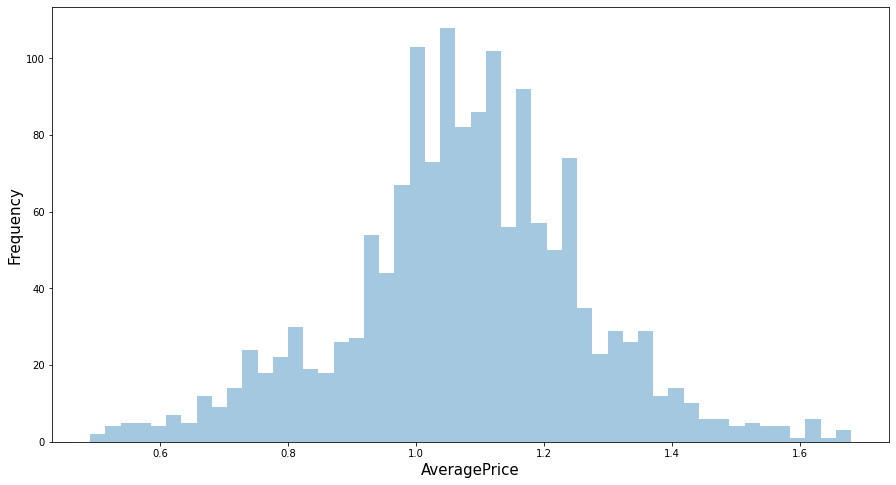

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(df1["AveragePrice"],bins=50,kde=False )
plt.xlabel("AveragePrice", Size=15)
plt.ylabel("Frequency", Size=15)
plt.show()

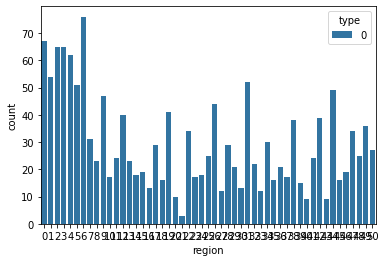

In [25]:
sns.countplot(x='region',hue='type',data=df1)

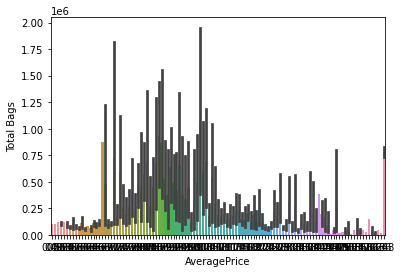

In [26]:
sns.barplot(x='AveragePrice',y='Total Bags',data=df1)

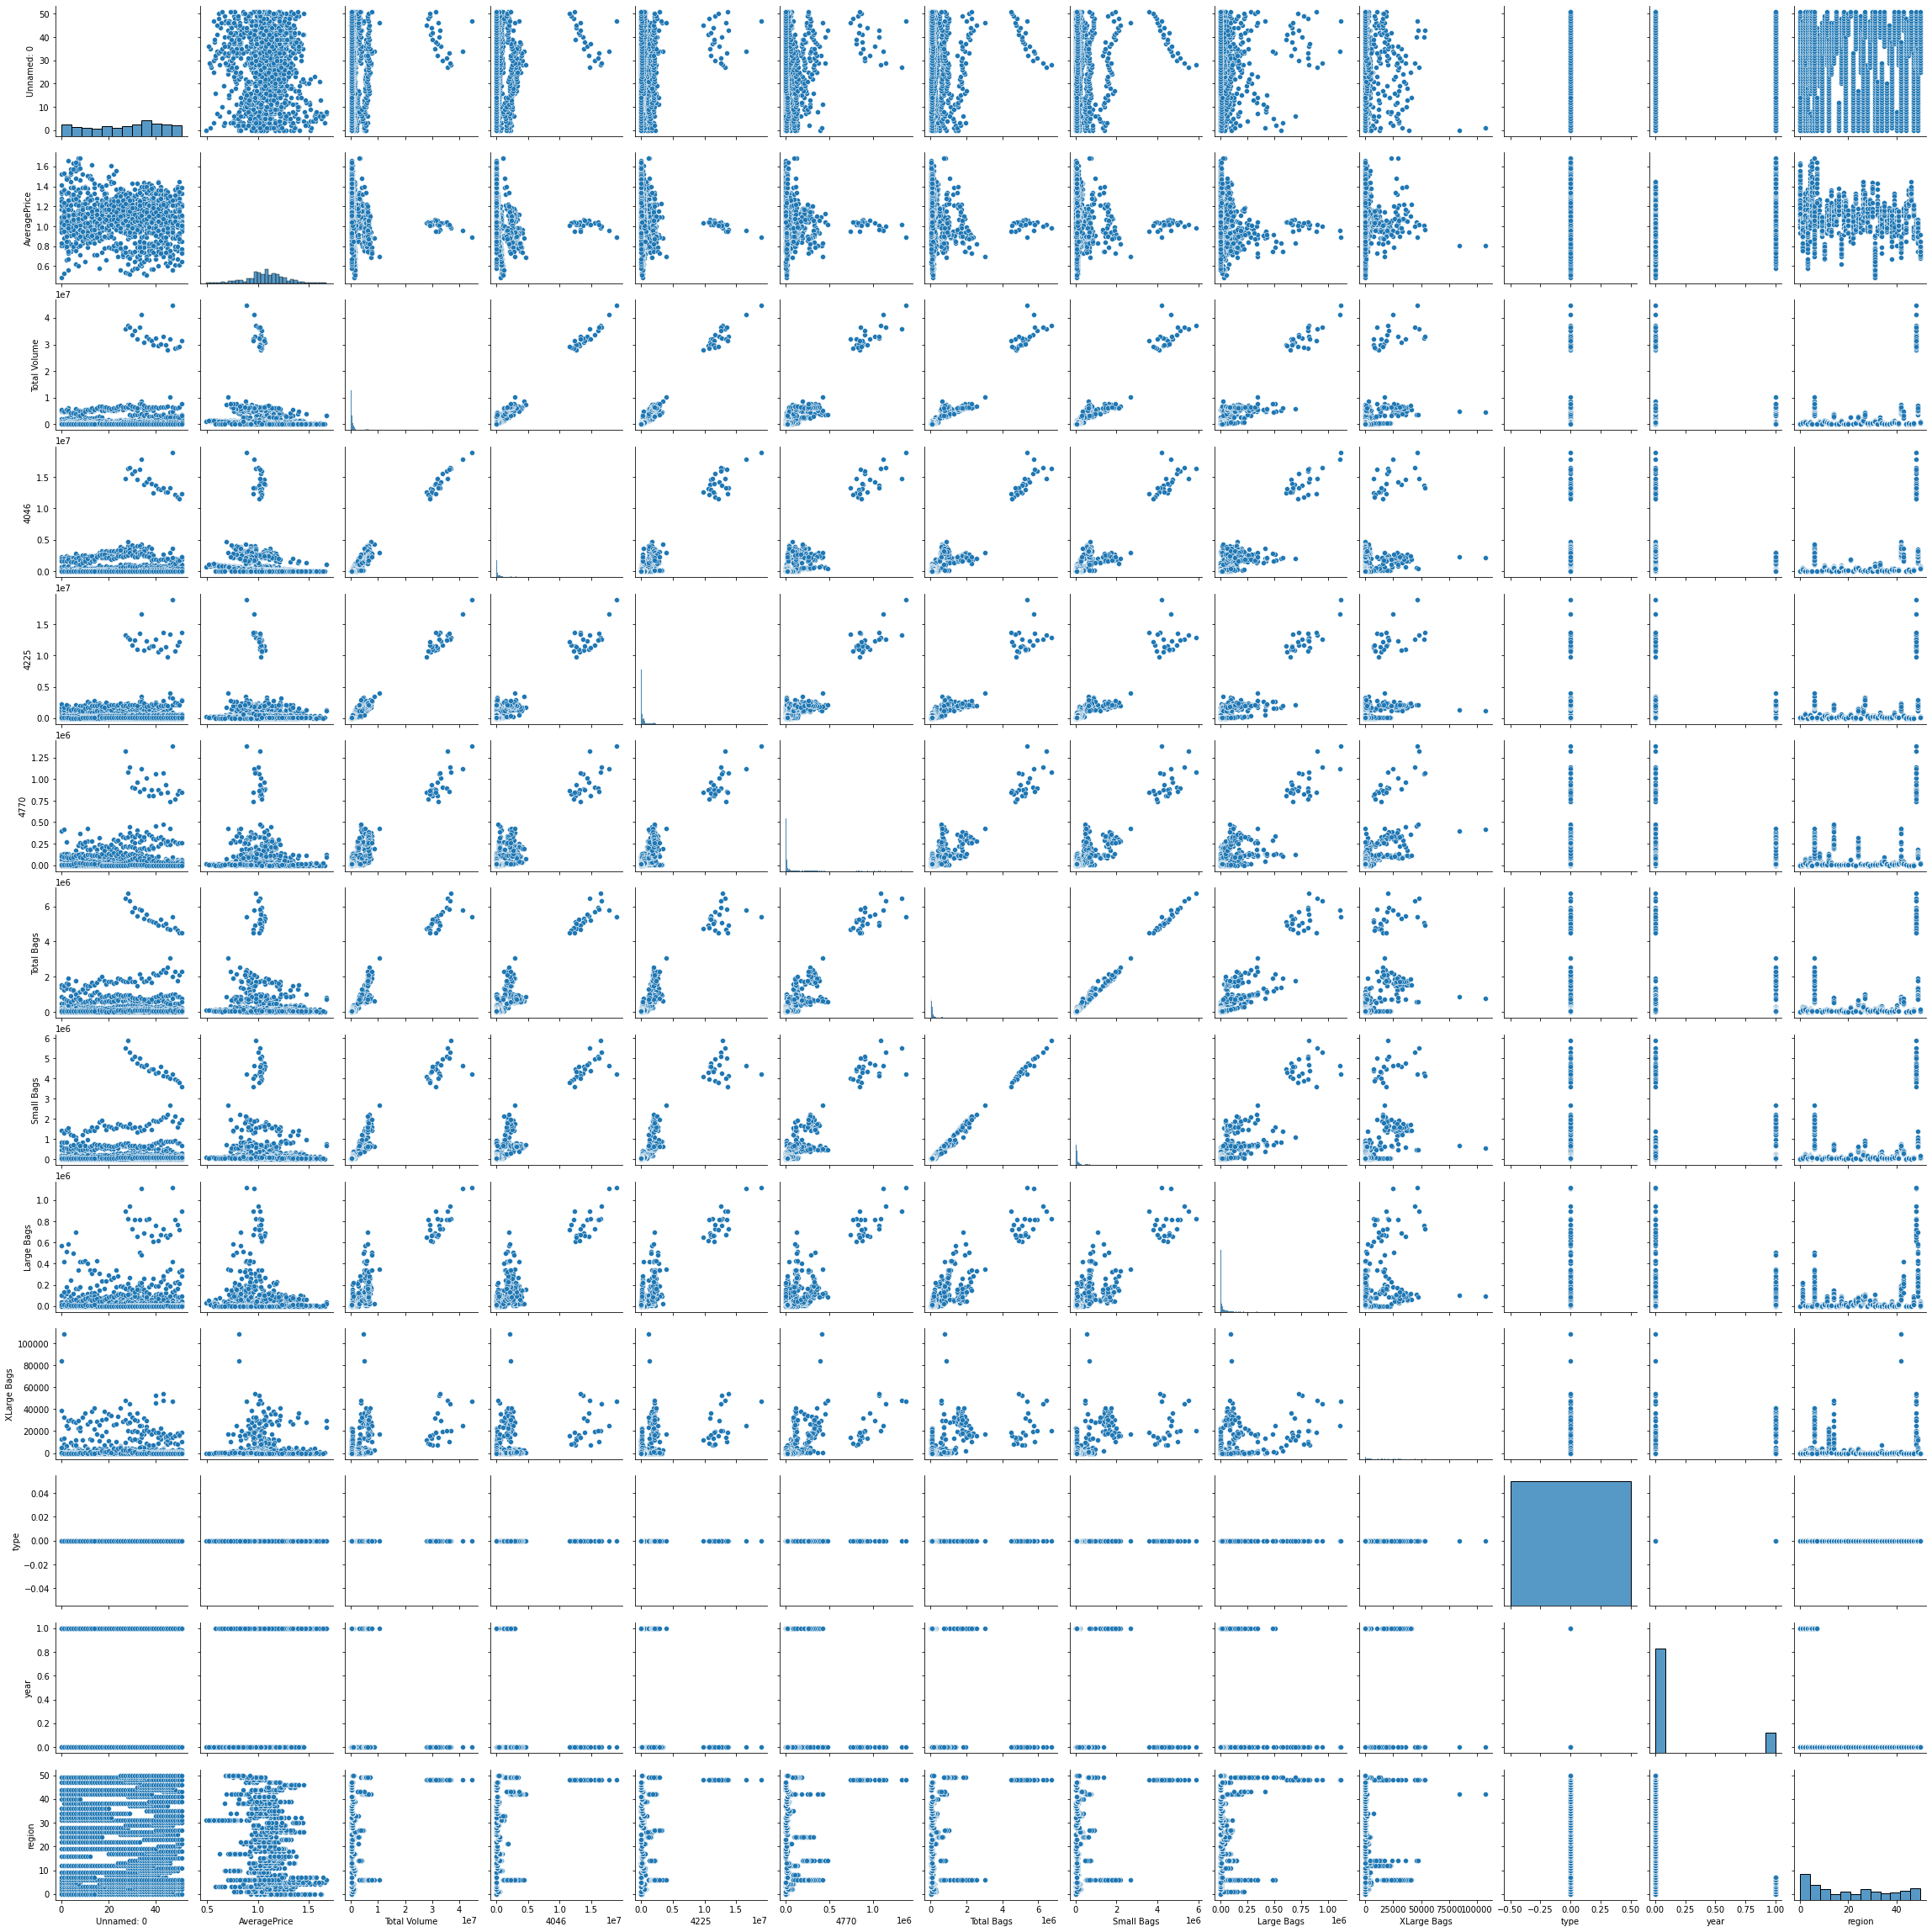

In [27]:
sns.pairplot(df1) #multivariate analysis

# Statistical Analysis

In [28]:
df1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,0.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,0.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,0.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,0.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,0.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,1.000000,50.000000


<function matplotlib.pyplot.show>

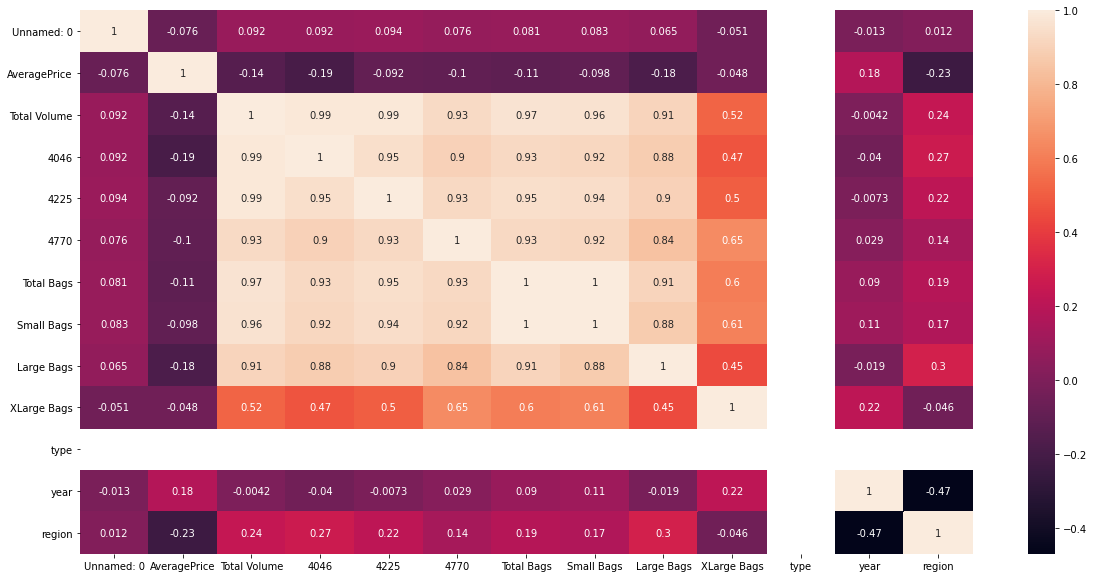

In [29]:
#Observing corelation between the columns through heatmap
##We observe positive correlation between AveragePrice and year only rest are negatively corelated

plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show

In [30]:
df1.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


In [31]:
#Dropping date column 
df1.drop(columns=["Date"],inplace=True)

In [32]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df1[i]=le.fit_transform(df1[i].astype(str))

In [33]:
df1.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [34]:
#calculating Z score
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.81868039, 1.35048079, 0.34696593, ...,        nan, 0.44100815,
        1.63524905],
       [1.75131034, 1.45639674, 0.34907791, ...,        nan, 0.44100815,
        1.63524905],
       [1.6839403 , 0.76783831, 0.33478463, ...,        nan, 0.44100815,
        1.63524905],
       ...,
       [1.01023983, 2.14485045, 0.32120275, ...,        nan, 2.26753179,
        1.41577447],
       [0.94286978, 2.09189247, 0.31878364, ...,        nan, 2.26753179,
        1.41577447],
       [0.87549974, 1.88006056, 0.3201721 , ...,        nan, 2.26753179,
        1.41577447]])

In [35]:
x=df1.drop(['AveragePrice'],axis=1)
y=df1['AveragePrice']

In [36]:
x.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1.0,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2.0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3.0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4.0,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [37]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [38]:
print(x.shape)
print(y.shape)

(1517, 12)
(1517,)


In [39]:
y=y.values.reshape(-1,1)

In [40]:
y.shape

(1517, 1)

In [41]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [42]:
x.skew()

Unnamed: 0     -0.234824
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region         -0.089741
dtype: float64

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [45]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 82 is 0.4575477787605233


In [46]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=3,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=3,scoring="r2").std())

Mean r2 score for Linear Regression: 0.08587361768499883
standard deviation in r2 score for Linear Regression 0.06424642705936653


In [47]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':(3,4,5,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parametors,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 10}


{'alpha': 0.1}


{'criterion': 'mae'}




{'alpha': 0.1}

In [48]:
knn=KNeighborsRegressor(n_neighbors=10)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'friedman_mse')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 66 is 0.6513853775659388


Mean r2 score for KNeighbor  Regression: -0.9009725789907892
standard deviation in r2 score for KNeighbor   Regression 1.1547717875960697

___________________________________________________________________________________________________________

max r2 score corresponding to 99 is 0.3711072031702004


Mean r2 score for Lasso Regression: 0.13419869795895398
standard deviation in r2 score for Lasso Regression 0.0779669395238548

___________________________________________________________________________________________________________

max r2 score corresponding to 63 is 0.8127429104321235


Mean r2 score for DecisionTreeRegressor : -1.0518728537313415
standard deviation in r2 score for DecisionTreeRegressor 1.694517662876778

_____________________________________________________________________________________________________________

max r2 score corresponding to 80 is 0.29437237524600157


Mean r2 score for Elastic net Regress

In [49]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'max_features': 'log2', 'n_estimators': 120}

In [50]:
rfr=RandomForestRegressor(max_features='log2',n_estimators=100)
i=maxr2_score(rfr,x,y)

max r2 score corresponding to 60 is 0.8811633496025348


In [51]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor : 0.14767213904303159
standard deviation in r2 score for RandomForestRegressor  0.3383545775839406


In [52]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.3787425381583544
0.5462690021717304
0.5200021976384328


In [53]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,50,100]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [54]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=20)
i=maxr2_score(gbr,x,y)

max r2 score corresponding to 47 is 0.639425981015048


In [55]:
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.1401201756721327
standard deviation in r2 score for gradient boosting Regression 0.4133409243779425


In [56]:
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,30,50],"base_estimator":[lreg,lsreg,dtr,rfr,enr]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'learning_rate': 1,
 'n_estimators': 20}

In [57]:
ada_reg=AdaBoostRegressor(Lasso(alpha=0.1),learning_rate=0.1,n_estimators=50)
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 82 is 0.4575477787605233


In [58]:
print("Mean r2 score for ada boosting Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression: 0.15143518328014968
standard deviation in r2 score for ada boosting Regression 0.0750973606502932


In [59]:
#From the above analysis w.r.t r2_score Random Forest Regressor is performing best
#So we will choose ElasticNet Regressor
#max r2_score is acived at random state 46
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 60 ,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

array([1.0474, 1.0948, 1.1272, 1.2622, 1.1496, 0.9029, 0.9743, 0.628 ,
       1.171 , 1.0586, 1.0974, 1.257 , 1.1622, 1.2709, 1.0961, 1.6025,
       1.3315, 1.0028, 0.6327, 0.9868, 0.5621, 1.1647, 1.5968, 1.4494,
       1.3883, 1.1591, 1.4402, 1.0818, 1.3526, 0.6747, 1.1075, 1.0453,
       0.8273, 0.9867, 1.0734, 1.1655, 1.2755, 1.0947, 1.1195, 1.003 ,
       1.0686, 1.1582, 0.9641, 1.1176, 0.6683, 1.0595, 0.992 , 1.0081,
       1.0869, 1.1552, 0.8096, 1.0536, 0.8865, 1.3341, 0.7642, 1.3517,
       1.291 , 1.4094, 1.2827, 1.1484, 0.9844, 1.0027, 1.2218, 1.1465,
       0.9608, 1.1837, 1.3498, 0.8189, 1.1209, 1.1286, 1.327 , 0.6632,
       1.1716, 1.0437, 0.9001, 1.1841, 1.0721, 1.0635, 0.8583, 1.1146,
       1.404 , 0.5257, 0.7571, 0.7839, 1.1929, 0.8327, 1.0207, 1.0828,
       1.1712, 1.4588, 1.1928, 1.3585, 1.1203, 1.2999, 1.1123, 1.0034,
       1.0844, 1.1243, 1.051 , 1.115 , 1.1107, 1.2323, 0.7456, 1.084 ,
       0.7651, 0.8191, 1.2818, 1.099 , 1.105 , 1.2318, 1.1344, 1.3083,
      

In [60]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.027376214224453237
r2_score is: 0.9824155555517191


In [61]:
x=df1.drop(['region'],axis=1)
y=df1['region']

In [62]:
x.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int64

In [64]:
print(x.shape)
print(y.shape)

(1517, 12)
(1517,)


In [65]:
y=y.values.reshape(-1,1)

In [66]:
y.shape

(1517, 1)

In [67]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [68]:
x.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [70]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1213, 12)
(1213, 1)
(304, 12)
(304, 1)


In [79]:
#Best parameters for SVC
from sklearn.svm import SVC
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors" :range(1,20)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy")}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")
#Best parameters for  AdaboostClassifier 
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


#Best parameters for  GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'C': 10, 'kernel': 'rbf'}


{'n_neighbors': 1}


{'criterion': 'entropy'}


{'max_features': 'log2', 'n_estimators': 100}


{'learning_rate': 0.1, 'n_estimators': 200}


{'learning_rate': 0.1, 'n_estimators': 150}




In [80]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [SVC(C=10,kernel='rbf'),KNeighborsClassifier(n_neighbors=1),
          DecisionTreeClassifier(criterion='entropy'),RandomForestClassifier(max_features='log2',n_estimators=50),
          AdaBoostClassifier(learning_rate =0.1, n_estimators = 200),
          GradientBoostingClassifier(learning_rate=0.1,n_estimators=150),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")



The model score for SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) are:
[32 34 25 12 35  1 47  0 36 23 19 23 23 15 48  4 35 12 34 24 50  3 23 12
  8  1  0 23 10 15 19 12 41 34 10 25 19 10 21 25 12 41 42 12  9  1 32  1
  2 29 47  0 25 11 23 39 47 23 26 37 22 43 34 11  9 18 25  4 31 17 42 12
 34 42 32 34 12 32 50 26 36 17 34 12 43 10 19 36 47  9 30 37 31 12  4 15
  6  0 16 36 48 33 18 25  6 11 35  9 50  5 31 48 25 45 39 37 34 44 50 25
 32 27 12  8 41  7 47 47  1 47 32  4  0 47 46 12 26 25 12 34 19 32 45 19
 12  1 40 12 15  7 44 19 26 12  7 23  2  0 42 16 11 35 29 50 31 22 28 34
 47 19  9 34 45 18 23 39 23  9 21  9 16 25 35 17 25 19 12 11 15 46 12 15
 18 20 30 10  7 30 21 17  7 46  0  1 47 39 21 25 31 44 47 12 45 46  5 27
 34 25 42 23  3 39  2 11  0  0  4 32  0 15 28 38 45 28 13 38 37 15 

In [81]:
result=pd.DataFrame({'Model':['KNeighborsClassifier','SVC','MultinomialNB','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_Score,Cross_val_score
0,KNeighborsClassifier,0.825658,0.653954
1,SVC,0.858553,0.429842
2,MultinomialNB,0.884868,0.816089
3,DecisionTreeClassifier,0.986842,0.934758
4,GradientBoostingClassifier,0.651316,0.599344
5,RandomForestClassifier,0.898026,0.800284
6,AdaBoostClassifier,0.924342,0.873521


In [82]:
dtc=DecisionTreeClassifier(criterion= 'entropy')
dtc.fit(x_train,y_train)
predict=dtc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)

Accuracy Score = 0.8980263157894737
The CV Score = 0.873521365294424


In [83]:
import joblib
joblib.dump(dtc,"avocado-Data.pkl")

['avocado-Data.pkl']